# Import libraries that we need for the project

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Load london venues data

In [2]:
venues="https://raw.githubusercontent.com/aglezc/Coursera_Capstone/master/venues.csv"
df_venue_london = pd.read_csv(venues)
df_venue_london.head(5)

,Unnamed: 0,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,0,The Red Lion,Pub,10 North Rd,GB,Bromley,United Kingdom,NaN,123,"['10 North Rd', 'Bromley', 'Greater London', '...","[{'label': 'display', 'lat': 51.40997241018873...",51.409972,0.021676,NaN,BR1 3LG,Greater London,4b634440f964a520996e2ae3
1,1,Barrel & Horn,Bar,204-206 High St,GB,Bromley,United Kingdom,NaN,808,"['204-206 High St', 'Bromley', 'Greater London...","[{'label': 'display', 'lat': 51.40591607268853...",51.405916,0.013724,NaN,BR1 1PW,Greater London,4ecd6c670aafd1868b867683
2,2,Cinnamon Culture,Indian Restaurant,46 Plaistow Lane,GB,Bromley,United Kingdom,NaN,355,"['46 Plaistow Lane', 'Bromley', 'Greater Londo...","[{'label': 'display', 'lat': 51.414196, 'lng':...",51.414196,0.020883,NaN,BR1 3PA,Greater London,4d6ffb26b73bb1f79bacb272
3,3,unico,Ice Cream Shop,75 High St,GB,Bromley,United Kingdom,NaN,1078,"['75 High St', 'Bromley', 'Greater London', 'B...","[{'label': 'display', 'lat': 51.40218872288535...",51.402189,0.015725,NaN,BR1 1JY,Greater London,55d9a196498eb815b1ed05b3
4,4,Havet,Turkish Restaurant,195-199 High St,GB,Bromley,United Kingdom,NaN,797,"['195-199 High St', 'Bromley', 'Greater London...","[{'label': 'display', 'lat': 51.40618386892237...",51.406184,0.013522,NaN,BR1 1NN,Greater London,50cf7f97e4b044ef7b70cefb


# Load Restaurant data

In [3]:


restaurants="https://raw.githubusercontent.com/aglezc/Coursera_Capstone/master/restaurants.csv"
df_restaurants_london = pd.read_csv(restaurants)
df_restaurants_london.rename(columns={'categories': 'restaurants'}, inplace=True)
df_restaurants_london.rename(columns={'Unnamed: 0': 'Index_restaurant'}, inplace=True)
df_restaurants_london = df_restaurants_london.drop('Unnamed: 0.1',axis=1)
df_restaurants_london.head(5)



,Index_restaurant,name,restaurants,address,cc,city,country,crossStreet,distance,formattedAddress,...,lat,lng,neighborhood,postalCode,state,id,Checkin TipCount,venue price,venue price index,venue rating
0,4,Havet,Turkish Restaurant,195-199 High St,GB,Bromley,United Kingdom,NaN,797,"['195-199 High St', 'Bromley', 'Greater London...",...,51.406184,0.013522,NaN,BR1 1NN,Greater London,50cf7f97e4b044ef7b70cefb,20.0,Moderate,2.0,8.0
1,6,wagamama,Asian Restaurant,NaN,GB,Bromley,United Kingdom,NaN,831,"['Bromley', 'Greater London', 'BR1 1DN', 'Unit...",...,51.404025,0.017960,NaN,BR1 1DN,Greater London,5780ed59498e131cf59f8599,2.0,Moderate,2.0,7.8
2,12,Nando's,Portuguese Restaurant,9 Widmore Rd,GB,Bromley,United Kingdom,NaN,696,"['9 Widmore Rd', 'Bromley', 'Greater London', ...",...,51.405981,0.016082,NaN,BR1 1RL,Greater London,4b02eb36f964a520014b22e3,15.0,Moderate,2.0,7.4
3,29,Tamasha,Indian Restaurant,131 Widmore Rd.,GB,Bromley,United Kingdom,at Homefield Rd.,580,"['131 Widmore Rd. (at Homefield Rd.)', 'Bromle...",...,51.406949,0.027044,NaN,BR1 3AX,Greater London,4b81547bf964a520c19f30e3,5.0,Moderate,2.0,6.9
4,38,Madisons,American Restaurant,32 Homesdale Rd,GB,Bromley Town,United Kingdom,NaN,1655,"['32 Homesdale Rd', 'Bromley Town', 'Greater L...",...,51.396830,0.028778,NaN,BR2 9LD,Greater London,50536ce4e4b0e932c8071e55,3.0,Moderate,2.0,7.2


# First 20 cities with major number of venues

In [4]:
df_venues = df_venue_london[['city','postalCode','categories']].groupby(['city','postalCode']).count() 
df_venuess = df_venues.sort_values(by=['categories'],ascending=False)
df_venuess.rename(columns={'categories': 'Number of venues '}, inplace=True)
df_venuess.head(20)

Number of venues 
city           postalCode                   
Brixton        SW9 8PS                    47
London         WC1V 7EN                   32
               W1T 3NP                    30
               EC2Y 8DS                   30
Hayes          UB3 3EX                    24
London         EC1R 4QE                   20
               EC4M 9AF                   20
               WC1B 3DG                   20
Crystal Palace SE19 3RY                   20
London         W11 2ED                    19
Croydon        CR0 1DP                    18
London         SE19 1RX                   18
               EC1V 9LT                   18
Croydon        CR0 1LD                    18
London         E1 6BJ                     18
               EC1R 3EA                   17
               WC1A 1LY                   17
               WC1N 3NB                   17
               WC2B 5JF                   16
               E2 7DJ                     16

# 20 cities with the major number of restaurants

In [5]:
df_venues = df_restaurants_london[['city','postalCode','restaurants']].groupby(['city','postalCode']).count()  
df_venuess = df_venues.sort_values(by=['restaurants'],ascending=False)
df_venuess.rename(columns={'restaurants': 'Number of restaurants '}, inplace=True)
df_venuess.head(20)

Number of restaurants 
city         postalCode                        
London       EC1R 4QE                        14
             EC2N 4AY                        13
Finchley     N12 0GL                         12
London       EC1R 0HA                        10
             EC1R 3EA                        10
             N3 1RT                          10
             N1 8ED                           9
Croydon      CR0 1LD                          9
Crouch End   N8 8TE                           9
London       EC1V 9LA                         9
Croydon      CR0 1DP                          9
London       EC4M 7DZ                         9
             EC1V 9LT                         9
             WC1N 3NB                         8
             E2 7JE                           8
Spitalfields E1 7LJ                           8
London       ec4a 3by                         7
             N8 9TE                           6
             E2 7DP                           6
Ilford       IG2 7RH                          6

# Get top 20 cities with number of retaurants with respective mean of rating and estaurants prices index


In [6]:
df_venues_agg = df_restaurants_london.groupby(['city','postalCode']).agg({'restaurants': 'count', 'venue rating':'mean', 'venue price index': 'mean'})  
df_venuess_agg = df_venues_agg.sort_values(by=['restaurants'],ascending=False)
df_venuess_agg.rename(columns={'restaurants': 'Number_of_restaurants','venue rating' : 'mean_rating','venue price index': 'mean_price_index'}, inplace=True)
df_venuess_agg.head(20)

mean_rating  Number_of_restaurants  mean_price_index
city         postalCode                                                      
London       EC1R 4QE       9.142857                     14          2.000000
             EC2N 4AY       9.207692                     13          3.692308
Finchley     N12 0GL        7.150000                     12          1.500000
London       EC1R 0HA       9.200000                     10          3.000000
             EC1R 3EA       9.200000                     10          2.000000
             N3 1RT         7.350000                     10          2.000000
             N1 8ED         9.100000                      9          2.000000
Croydon      CR0 1LD        7.533333                      9          2.000000
Crouch End   N8 8TE         8.422222                      9          1.000000
London       EC1V 9LA       9.100000                      9          2.000000
Croydon      CR0 1DP        6.533333                      9          1.666667
London       EC4M 7DZ       9.200000                      9          2.000000
             EC1V 9LT       9.200000                      9          3.000000
             WC1N 3NB       9.100000                      8          2.000000
             E2 7JE         9.600000                      8          2.000000
Spitalfields E1 7LJ         9.100000                      8          2.000000
London       ec4a 3by       9.100000                      7          1.000000
             N8 9TE         9.000000                      6          2.000000
             E2 7DP         9.400000                      6          2.000000
Ilford       IG2 7RH        6.500000                      6          1.000000

# clean data 

In [7]:


features = df_restaurants_london[['Checkin TipCount','venue rating','venue price index']]
cleanfeatures = features.dropna(axis=0)

Q5= cleanfeatures.quantile(0.05)
Q95 = cleanfeatures.quantile(0.95)
index_outliers_ll = (cleanfeatures< Q5) 
index_outliers_ul = (cleanfeatures > Q95)
cleanfeatures.mask(index_outliers_ll, Q5, axis=1) 
cleanfeatures.mask(index_outliers_ul, Q95, axis=1) 
cleanfeatures.head(10)



,Checkin TipCount,venue rating,venue price index
0,20.0,8.0,2.0
1,2.0,7.8,2.0
2,15.0,7.4,2.0
3,5.0,6.9,2.0
4,3.0,7.2,2.0
5,1.0,5.9,1.0
9,2.0,7.8,2.0
10,20.0,8.0,2.0
11,3.0,7.2,2.0
12,15.0,7.4,2.0


# Cluster data 

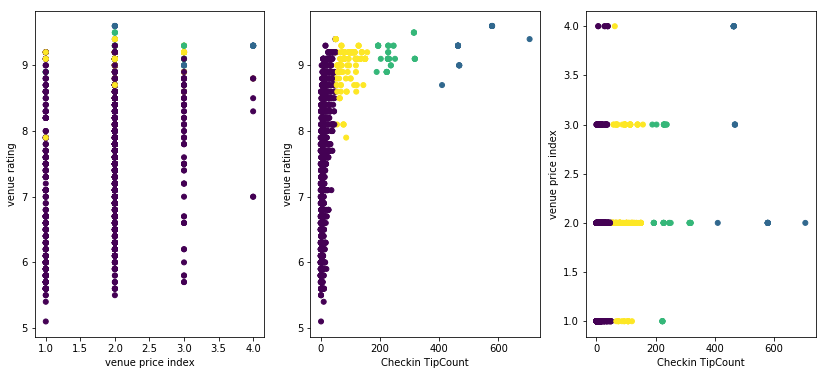

In [8]:
k_means = KMeans(n_clusters=4, random_state=0).fit(cleanfeatures)


y_kmeans = k_means.predict(cleanfeatures)
plt.figure(figsize=(14, 6))
plt.subplot(131)
plt.scatter(cleanfeatures.loc[:, 'venue price index'], cleanfeatures.loc[:, 'venue rating'], c=y_kmeans, s=25 , cmap='viridis')
plt.xlabel('venue price index')
plt.ylabel('venue rating')
plt.subplot(132)
plt.scatter(cleanfeatures.loc[:, 'Checkin TipCount'], cleanfeatures.loc[:, 'venue rating'], c=y_kmeans, s=25, cmap='viridis')
plt.xlabel('Checkin TipCount')
plt.ylabel('venue rating')
plt.subplot(133)
plt.scatter(cleanfeatures.loc[:, 'Checkin TipCount'], cleanfeatures.loc[:, 'venue price index'], c=y_kmeans, s=25, cmap='viridis')
plt.xlabel('Checkin TipCount')
plt.ylabel('venue price index')

plt.show()
